# <font color=#023F7C> **Data Visualization** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >

**Name**: Théo VIDAL           <br>
**School**: ENSTA Paris         <br>
**Group number**: 7    <br>
**Track**: Intermediate

Note: this notebook has been executed on my personal computer using DataSpell (JetBrains IDE).

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) #Show all columns

## 1. Import the cleaned data

In [4]:
# We filtered na values while cleaning, so we must pass the "na_filter" argument if we want the "None" medal to be categorized correctly
df = pd.read_csv('data/athlete_events_cleaned.csv', na_filter=False).drop_duplicates()

In [5]:
regions = pd.read_csv(r"data/noc_regions.csv")
dict_regions = dict(zip(regions["NOC"].to_list(), regions["region"].to_list()))
countries = df["NOC"].map(dict_regions)
df.insert(8, "Country", countries)

In [6]:
dict_host_country = {
  "Seoul":"South Korea",
  "Barcelona":"Spain",
  "Atlanta":"USA",
  "Sydney":"Australia",
  "Athina":"Greece",
  "Beijing":"China",
  "Melbourne":"Australia",
  "Los Angeles":'USA',
  "St. Louis": 'USA',
  "Moskva":"Russia",
  "Montreal":"Canada",
  "Munich" :"Germany",
  "Berlin":"Germany",
  "Mexico City":"Mexico",
  "Tokyo":"Japan",
  "Roma":"Italy",
  "Calgary": "Canada",
  "Paris":"France",
  "Albertville": "France",
  "Lillehammer": "Norway",
  "Helsinki": "Finland",
  "Amsterdam":"Netherlands",
  "Antwerpen": "Belgium",
  "Stockholm": "Sweden",
  "Rio de Janeiro":"Bresil",
  "Salt Lake City": "USA",
  'Lake Placid': "USA",
  "Sochi": "Russia",
  "Nagano": "Japan",
  "Torino": "Italy",
  'Sarajevo': 'Bosnia and Herzegovina',
  'Vancouver': 'Canada',
  'Innsbruck': 'Austria',
  'Grenoble': 'France',
  'Sapporo': 'Japan',
  'Chamonix': 'France',
  'Garmisch-Partenkirchen': 'Germany',
  'Sankt Moritz': 'Switzerland',
  "Cortina d'Ampezzo": "Italy",
  "Squaw Valley": "USA",
  "Oslo": "Norway",
  "London":"UK"}
df["Host_country"] = df["City"].map(dict_host_country)
df["Won_host_country"] = df["Host_country"] == df["Country"]
df.reset_index(drop=True, inplace=True)

In [8]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Country,Games,Year,Season,City,Sport,Event,Medal,Host_country,Won_host_country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,Spain,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,UK,False
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Canada,False
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None,Canada,False
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None,France,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206835,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,Poland,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,Austria,False
206836,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,Russia,False
206837,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,Russia,False
206838,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,Japan,False


## 2. Create visualization plots

### Proportion of each medal type for all Olympics

<Axes: title={'center': 'Total proportion of each medal type for all Olympics'}, ylabel='count'>

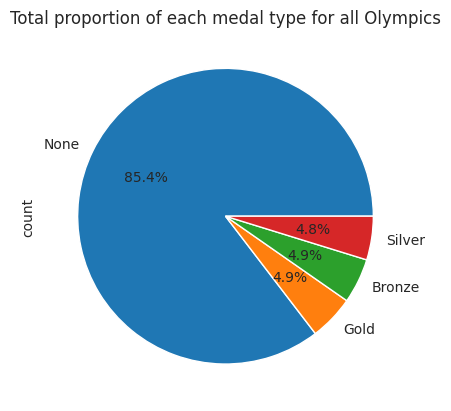

In [61]:
medal_proportions = df["Medal"].value_counts() / len(df)
medal_proportions.plot(kind='pie', autopct='%1.1f%%', title='Total proportion of each medal type for all Olympics')

### Number of medal for each OG in Summer and Winter

In [10]:
df["has_medal"] = df["Medal"] != "None"

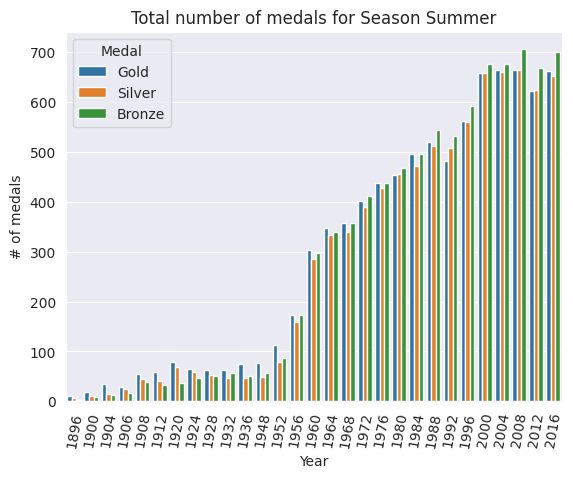

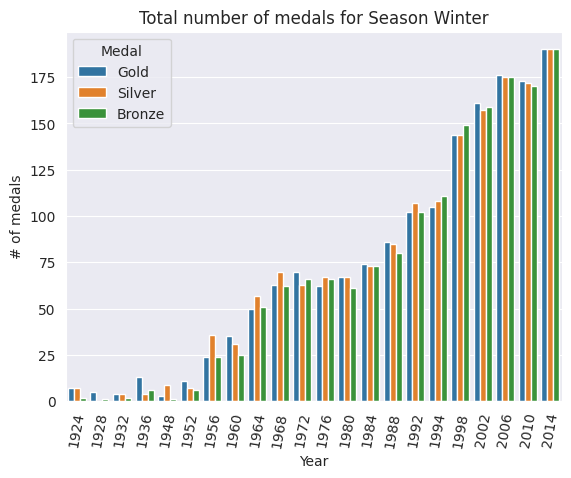

In [11]:
medal_winners_df = df[df["has_medal"]]

m = None
for season, group in medal_winners_df.groupby('Season'):
  counts = group.groupby(['Year'])["Medal"].value_counts()
  plt.figure()
  sns.barplot(data=counts.reset_index(), x='Year', y='count', hue='Medal')
  plt.title(f'Total number of medals for Season {season}')
  plt.ylabel('# of medals')
  plt.xticks(rotation=80)

During the first Summer olympics, back in the beginning of the 20th century, the majority of medals were Gold ones.

The proportion of each medal type got more balanced starting with the 1960 Games.

### Average number of medals won when a country hosts the Olympic Games and when it does not, for Summer Olympics after 1950

In [62]:
games_filtered_df = medal_winners_df[(medal_winners_df["Year"] >= 1950) & (medal_winners_df["Season"] == "Summer")]
host_countries = df["Host_country"].unique()
medals_per_group = games_filtered_df.groupby(['Won_host_country', 'Games', 'Country'])["Medal"].count().reset_index(name='Medal_Count')

In [15]:
medals_per_group[medals_per_group["Country"].isin(host_countries)].groupby('Won_host_country')['Medal_Count'].mean()

Won_host_country
False     48.221865
True     134.562500
Name: Medal_Count, dtype: float64

In [64]:
print(f'List of hosting countries: {", ".join(host_countries)}')
print(f'Proportion of hosting countries over all countries: {100 * len(df["Host_country"].unique()) / len(df["Country"].unique()):.2f}%')

List of hosting countries: Spain, UK, Canada, France, Norway, USA, Australia, Russia, Finland, Japan, Italy, Bresil, Greece, Bosnia and Herzegovina, Mexico, Germany, Belgium, Netherlands, China, South Korea, Austria, Sweden, Switzerland
Proportion of hosting countries over all countries: 11.17%


Let's print the average number of medals won per games per hosting country:

In [17]:
medals_per_group.groupby("Country")["Medal_Count"].mean().sort_values(ascending=False).reset_index()

,Country,Medal_Count
0,USA,209.312500
1,Russia,182.625000
2,Germany,148.941176
3,China,101.111111
4,Australia,69.176471
...,...,...
126,Gabon,1.000000
127,Eritrea,1.000000
128,Sri Lanka,1.000000
129,Sudan,1.000000


Hosting countries already have a great average number of medals, driving up the average for this group. Moreover, a small fraction of the world ever hosted the Games, hence small committees from countries that never hosted the games drive down the other average.

### Average number of medals won when the country is a host and when it is not

In [65]:
medals_summary_df = medals_per_group.groupby(['Country', 'Won_host_country'])["Medal_Count"].mean().reset_index()
medals_summary_df.rename(columns={'Won_host_country': 'Host', 'Medal_Count': 'Average_Medals'}, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Belgium'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Finland'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Greece'),
  Text(9, 0, 'Italy'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'Mexico'),
  Text(12, 0, 'Netherlands'),
  Text(13, 0, 'Norway'),
  Text(14, 0, 'Russia'),
  Text(15, 0, 'South Korea'),
  Text(16, 0, 'Spain'),
  Text(17, 0, 'Sweden'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'UK'),
  Text(20, 0, 'USA')])

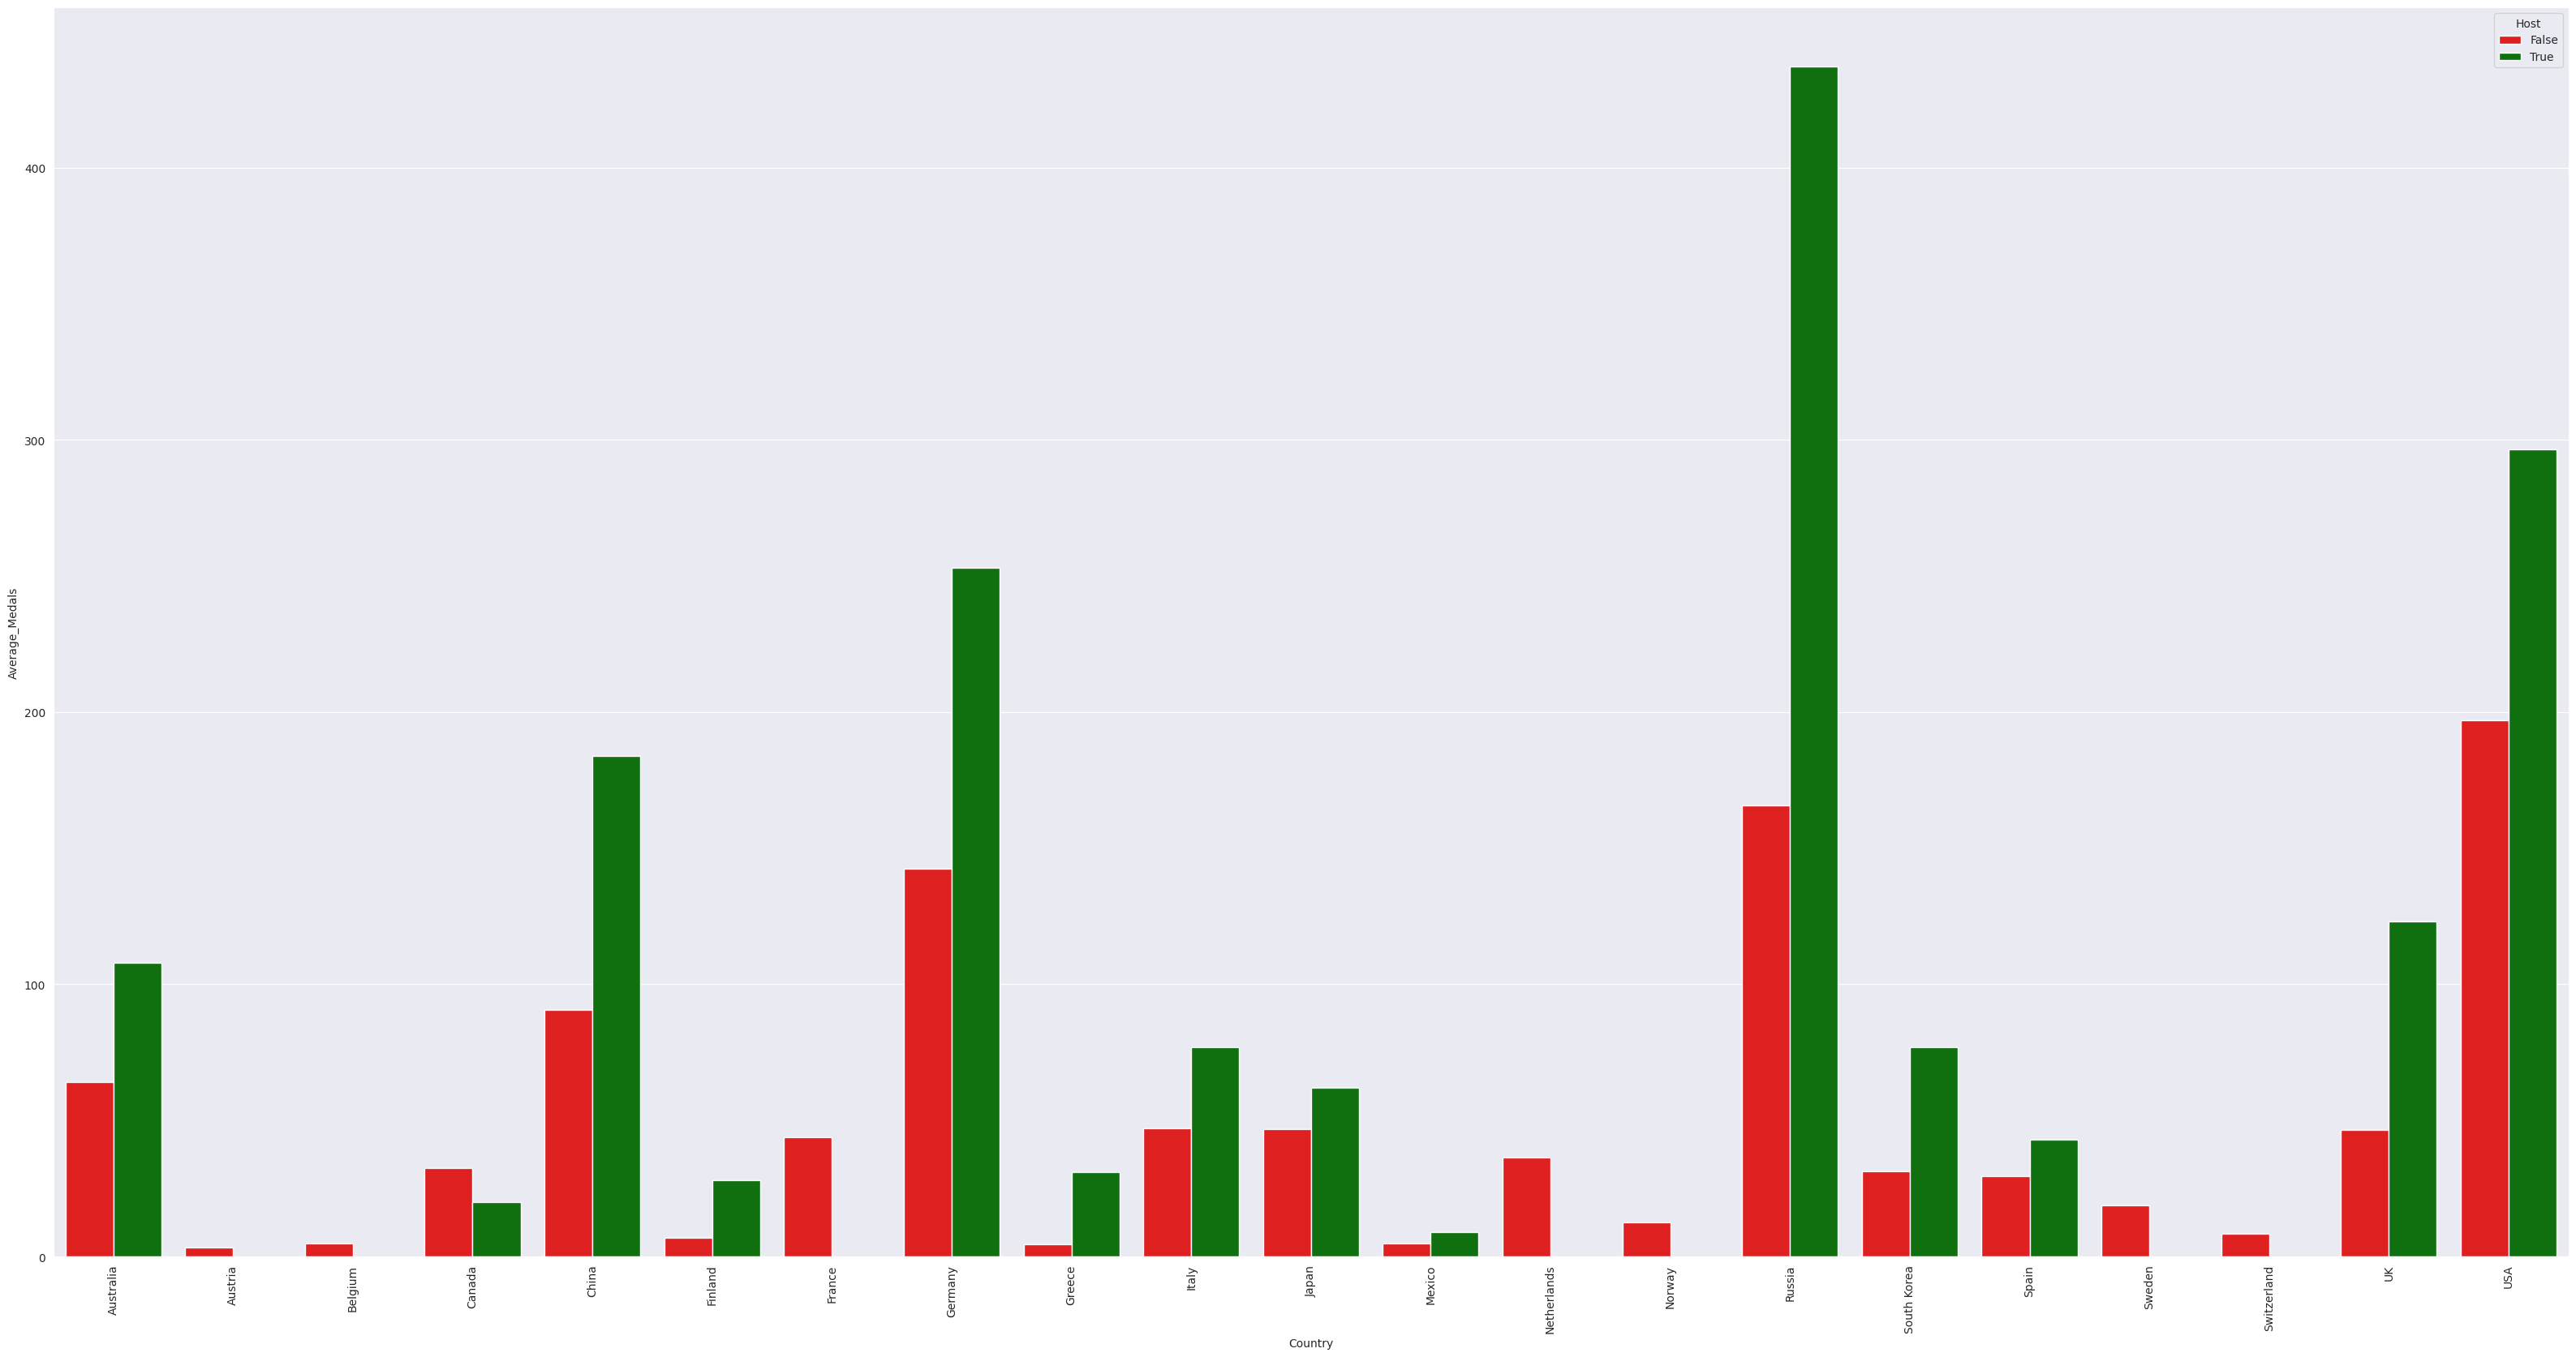

In [67]:
hosts_medals_summary = medals_summary_df[medals_summary_df["Country"].isin(host_countries)]

plt.figure(figsize=(40, 20))
sns.barplot(data=hosts_medals_summary, x="Country", y="Average_Medals", hue="Host", palette=['red', 'green'])
plt.xticks(rotation=90)

The mast majority of countries have way better results in olympic games (in terms of medals number) when hosting the games.

However, a country doesn't regularly hosts the games (see the table below), so the average number of medals when not hosting the games is subject to variations: some games may just have been bad ones for their country, driving down the mean. 

Moveover, the athletes can be more present if their country is hosting the event, for financial and geographical reasons (and sometimes for political reasons too). The mean for hosting countries can be influenced by extreme values. These two arguments are explored at question 8.

Let's print the ratio between the number of Games hosted, and the number of participations, for each country that ever hosted the game:

In [44]:
hosts_df = df[df["Country"].isin(host_countries)]
host_over_participation_df = hosts_df["Host_country"].value_counts() / hosts_df["Country"].value_counts()
host_over_participation_df.dropna().sort_values(ascending=False)

Bosnia and Herzegovina    13.250000
Greece                     4.066844
Mexico                     2.177489
South Korea                1.892172
Spain                      1.496199
Australia                  1.341324
China                      1.341087
USA                        1.253096
Canada                     1.247556
Japan                      1.119995
Italy                      1.024542
UK                         0.991897
Norway                     0.737341
Austria                    0.660336
Russia                     0.613189
France                     0.517423
Germany                    0.486804
Finland                    0.277968
Belgium                    0.233276
Netherlands                0.125771
Sweden                     0.113662
Switzerland                0.024219
Name: count, dtype: float64

### Correlation matrix

In [21]:
corr_matrix = df.corr(numeric_only=True)

<Axes: >

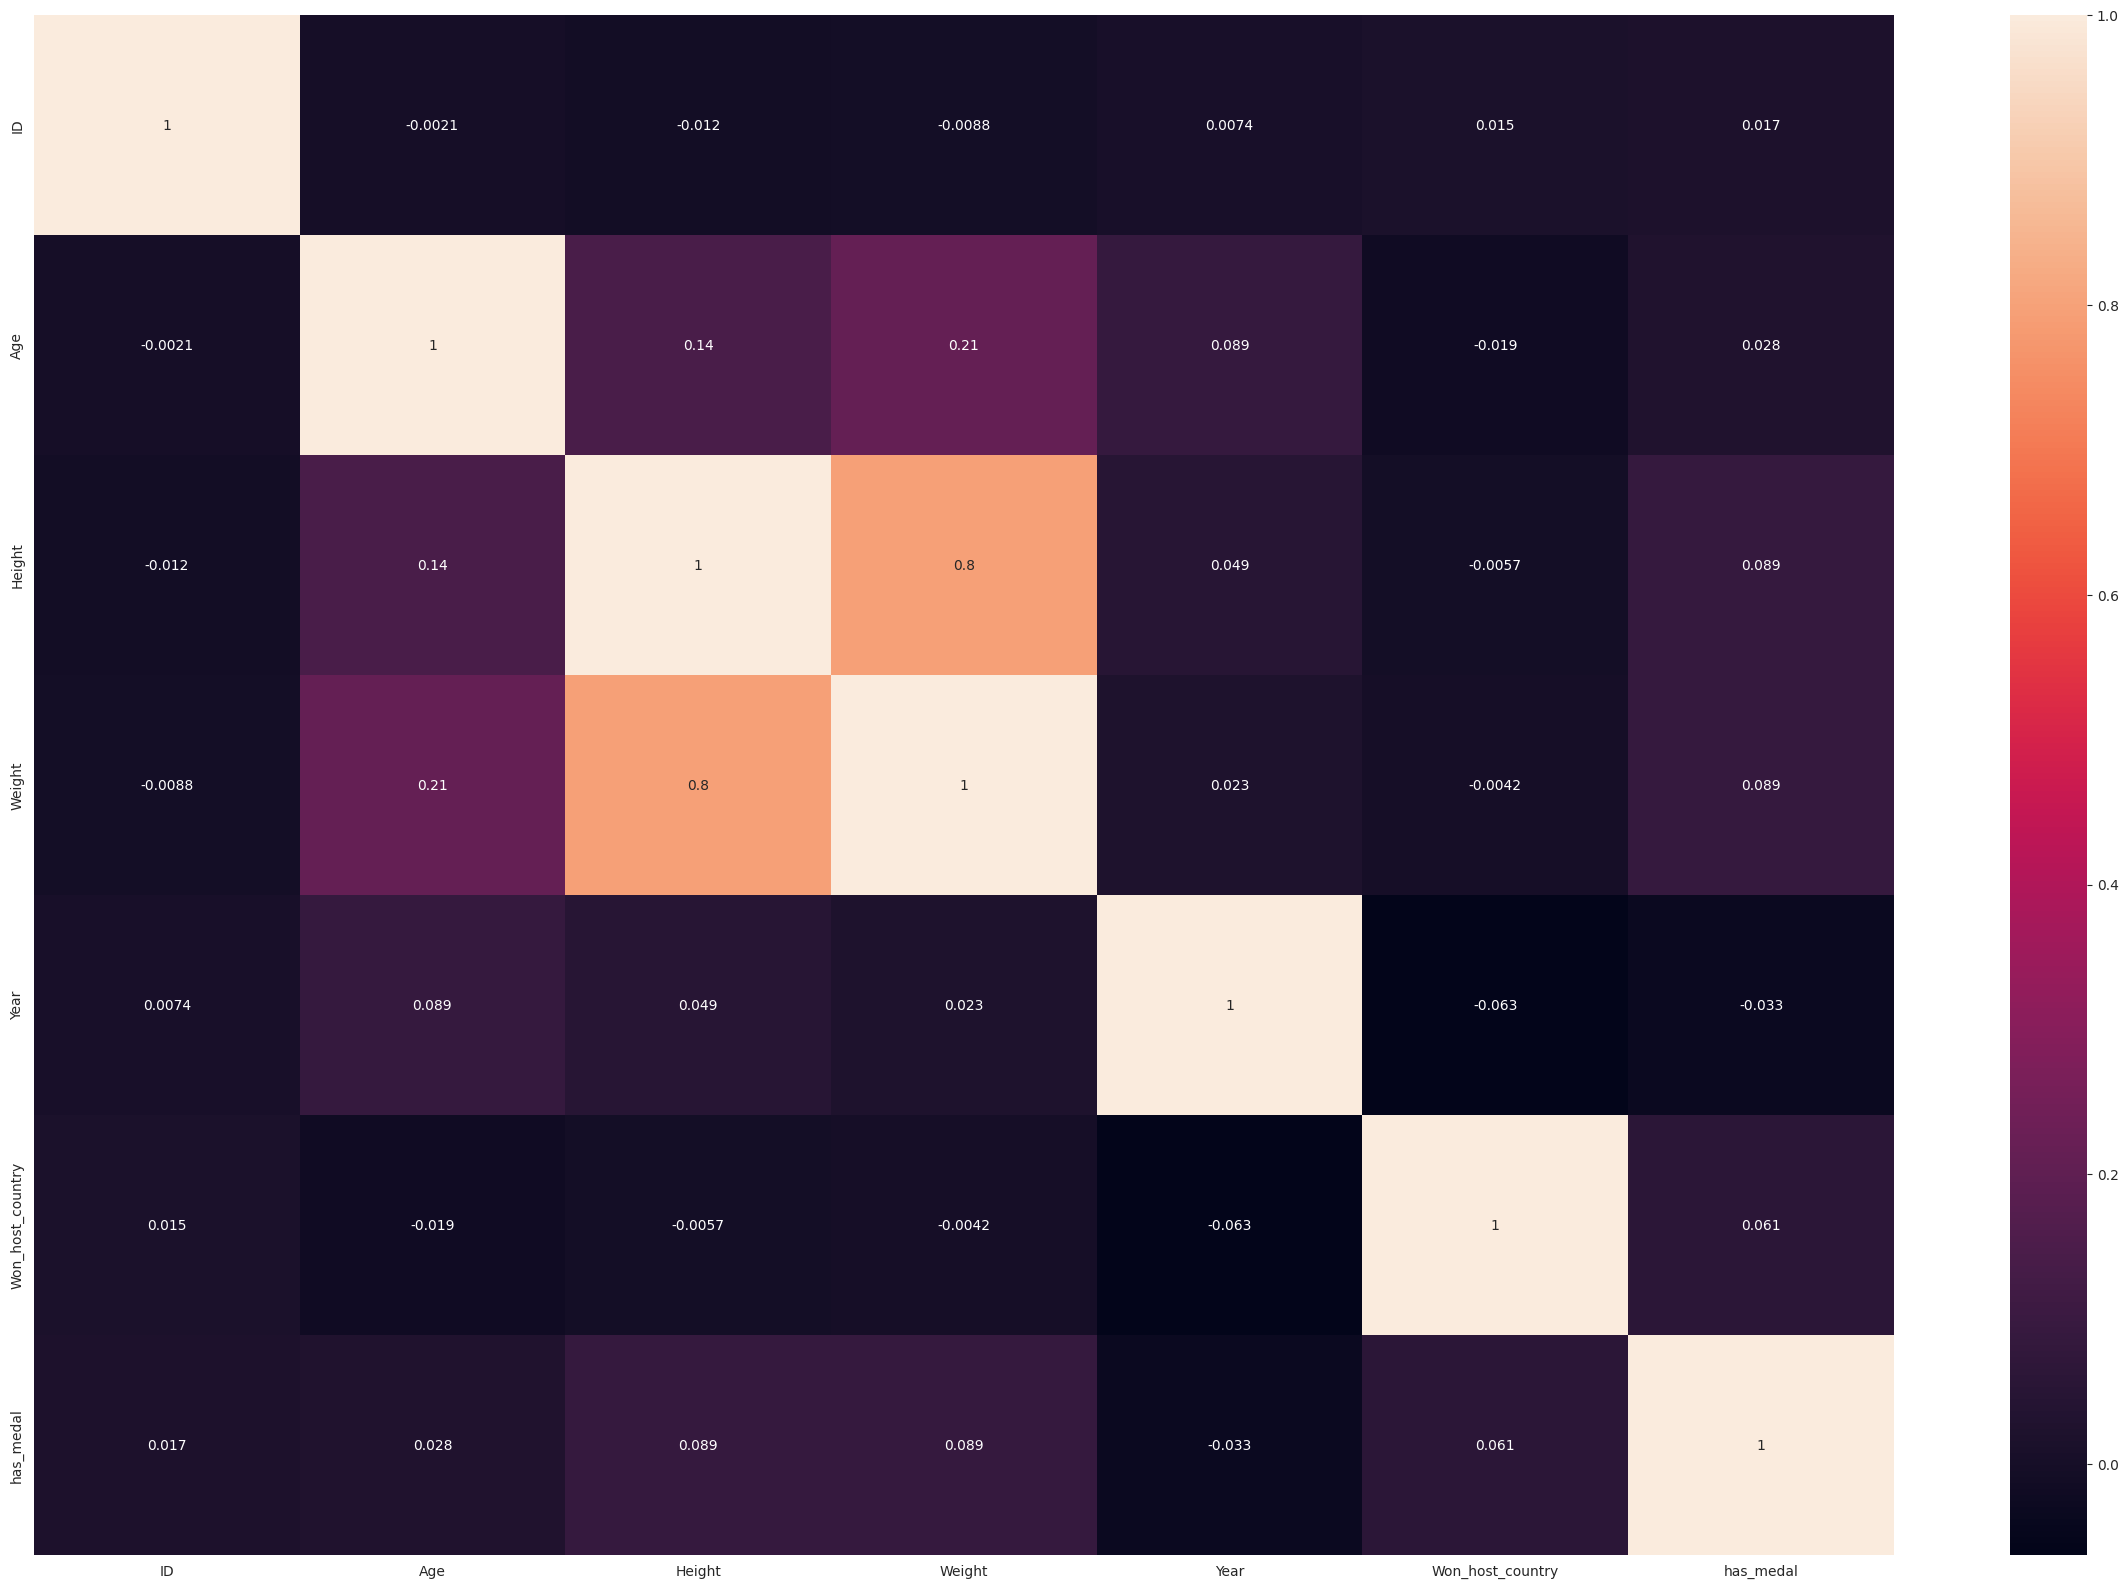

In [22]:
plt.figure(figsize=(30, 20))
sns.heatmap(data=corr_matrix, annot=True)

In [23]:
print(f'Correlation between Height and Weight: {corr_matrix.loc["Height"]["Weight"]:.3f}')

Correlation between Height and Weight: 0.796


Height and Weight are highly correlated: indeed, a taller athlete has better chances to weight more, as they have more room for muscles (we suppose here that they have very low amounts of fat, as they practice sport at high frequency).
This is of course not always the case, and it depends on the sport: swimming or shot put don't require the same amount and distribution of muscle mass.

Other variables don't have much reason to influence the others, especially Year, ID, and has_medal. Even the Age doen't really acts on height and weight, as these physical characteristics are tied to the sport the athlete is practicing.

### Distribution of the age for gold medal winners

/tmp/ipykernel_7745/2924344561.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, '# of gold medal winners')

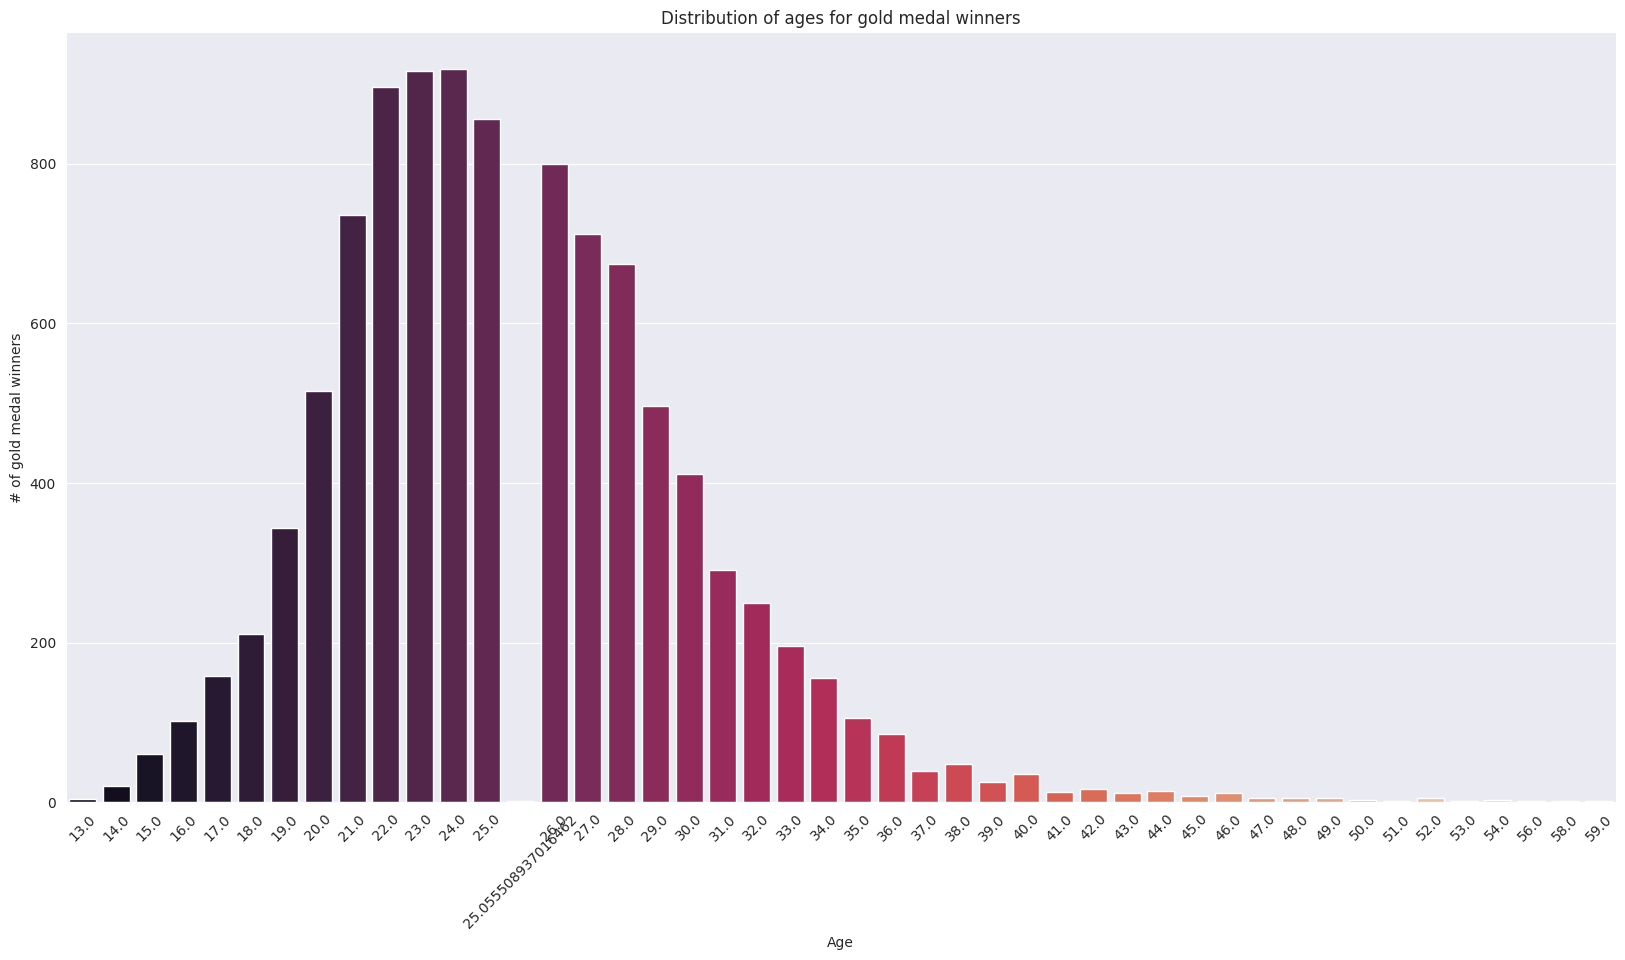

In [68]:
gold_medal_athletes = df[df["Medal"] == "Gold"]
plt.figure(figsize=(20, 10))
sns.countplot(data=gold_medal_athletes, x="Age", palette="rocket")
plt.title("Distribution of ages for gold medal winners")
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('# of gold medal winners')

The average value in the middle corresponds to NaN values we filled during the Data cleaning process.

Medal winners are generally young adults, which can be physically explained: as we grow older, our aptitudes tend do decrease.

### Broader analysis of the link between hosting the Games and the number of medals won

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Spain'),
  Text(10, 0, 'Sweden'),
  Text(11, 0, 'Switzerland'),
  Text(12, 0, 'UK'),
  Text(13, 0, 'USA'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'Canada'),
  Text(16, 0, 'Finland'),
  Text(17, 0, 'Greece'),
  Text(18, 0, 'South Korea'),
  Text(19, 0, 'Mexico'),
  Text(20, 0, 'China')])

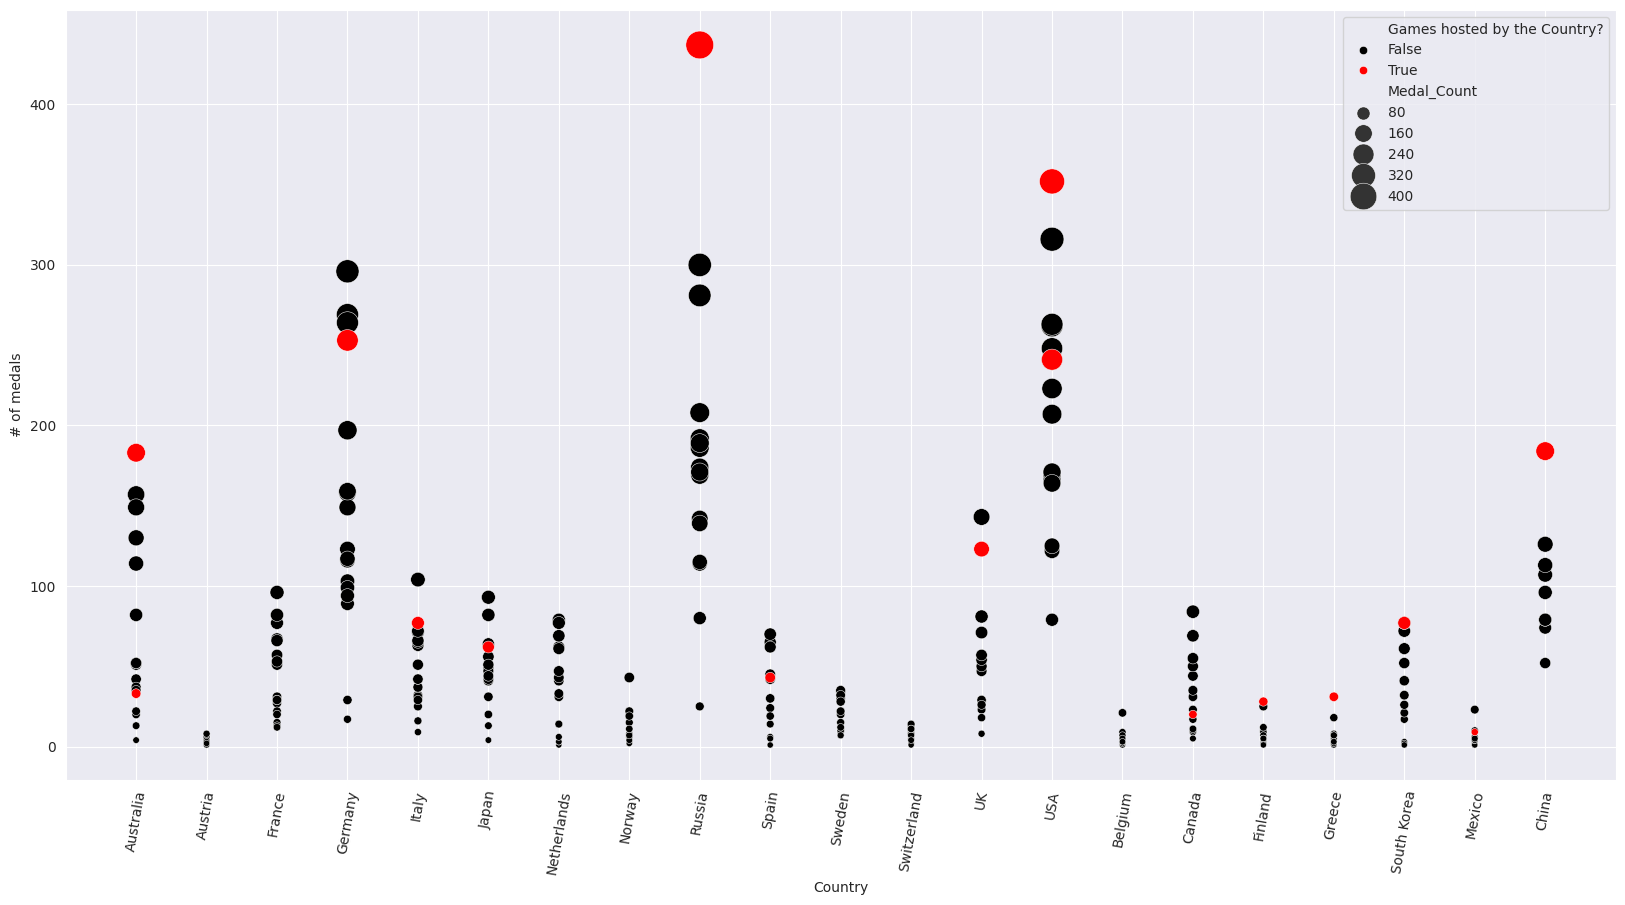

In [77]:
hosts_medals_per_group = medals_per_group[medals_per_group["Country"].isin(host_countries)].rename(columns={
  'Won_host_country': 'Games hosted by the Country?',
})

plt.figure(figsize=(20, 10))
sns.scatterplot(data=hosts_medals_per_group, x='Country', y='Medal_Count', palette=['black', 'red'], size='Medal_Count', hue='Games hosted by the Country?', sizes=(20, 400))
plt.ylabel('# of medals')
plt.xticks(rotation=80)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Spain'),
  Text(10, 0, 'Sweden'),
  Text(11, 0, 'Switzerland'),
  Text(12, 0, 'UK'),
  Text(13, 0, 'USA'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'Canada'),
  Text(16, 0, 'Finland'),
  Text(17, 0, 'Greece'),
  Text(18, 0, 'South Korea'),
  Text(19, 0, 'Mexico'),
  Text(20, 0, 'China')])

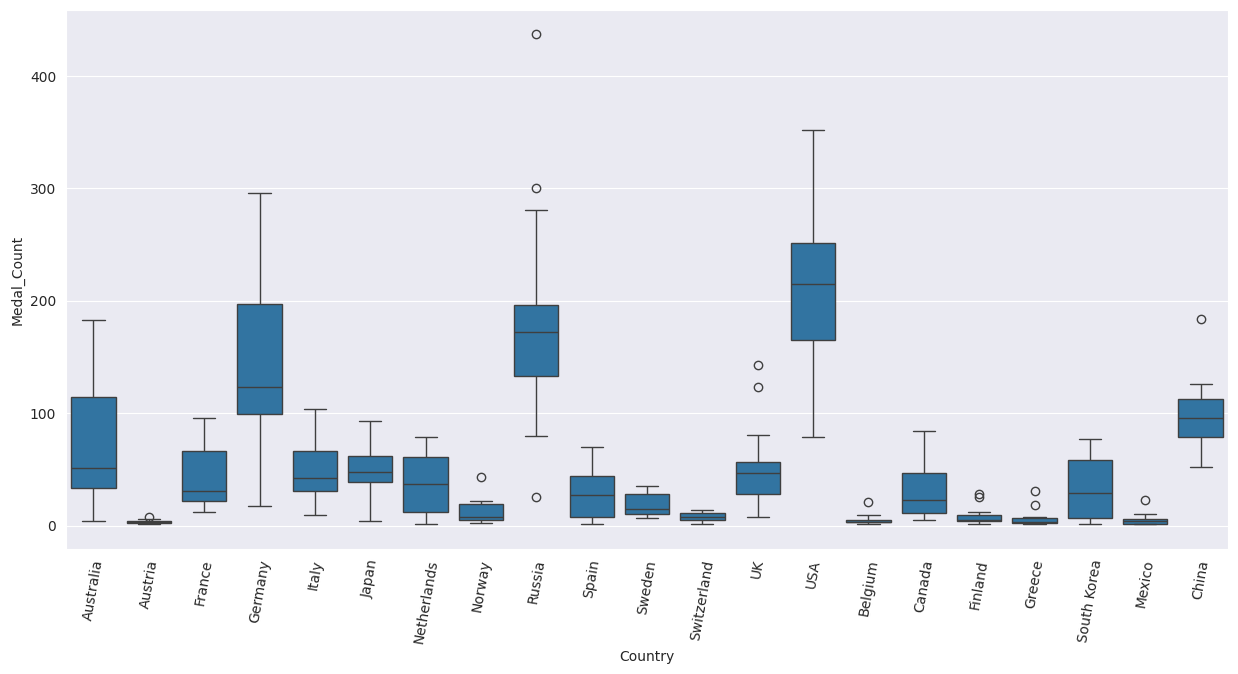

In [79]:
plt.figure(figsize=(15, 7))
sns.boxplot(
  data=hosts_medals_per_group,
  x='Country',
  y='Medal_Count'
)
plt.xticks(rotation=80)

With a bar plot, we clearly see that the number of medals while hosting the Olympic Games is often at the higher edge of the distribution, and can even be an outlier.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Belgium'),
  Text(3, 0, 'Bosnia and Herzegovina'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'China'),
  Text(6, 0, 'Finland'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Greece'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Japan'),
  Text(12, 0, 'Mexico'),
  Text(13, 0, 'Netherlands'),
  Text(14, 0, 'Norway'),
  Text(15, 0, 'Russia'),
  Text(16, 0, 'South Korea'),
  Text(17, 0, 'Spain'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Switzerland'),
  Text(20, 0, 'UK'),
  Text(21, 0, 'USA')])

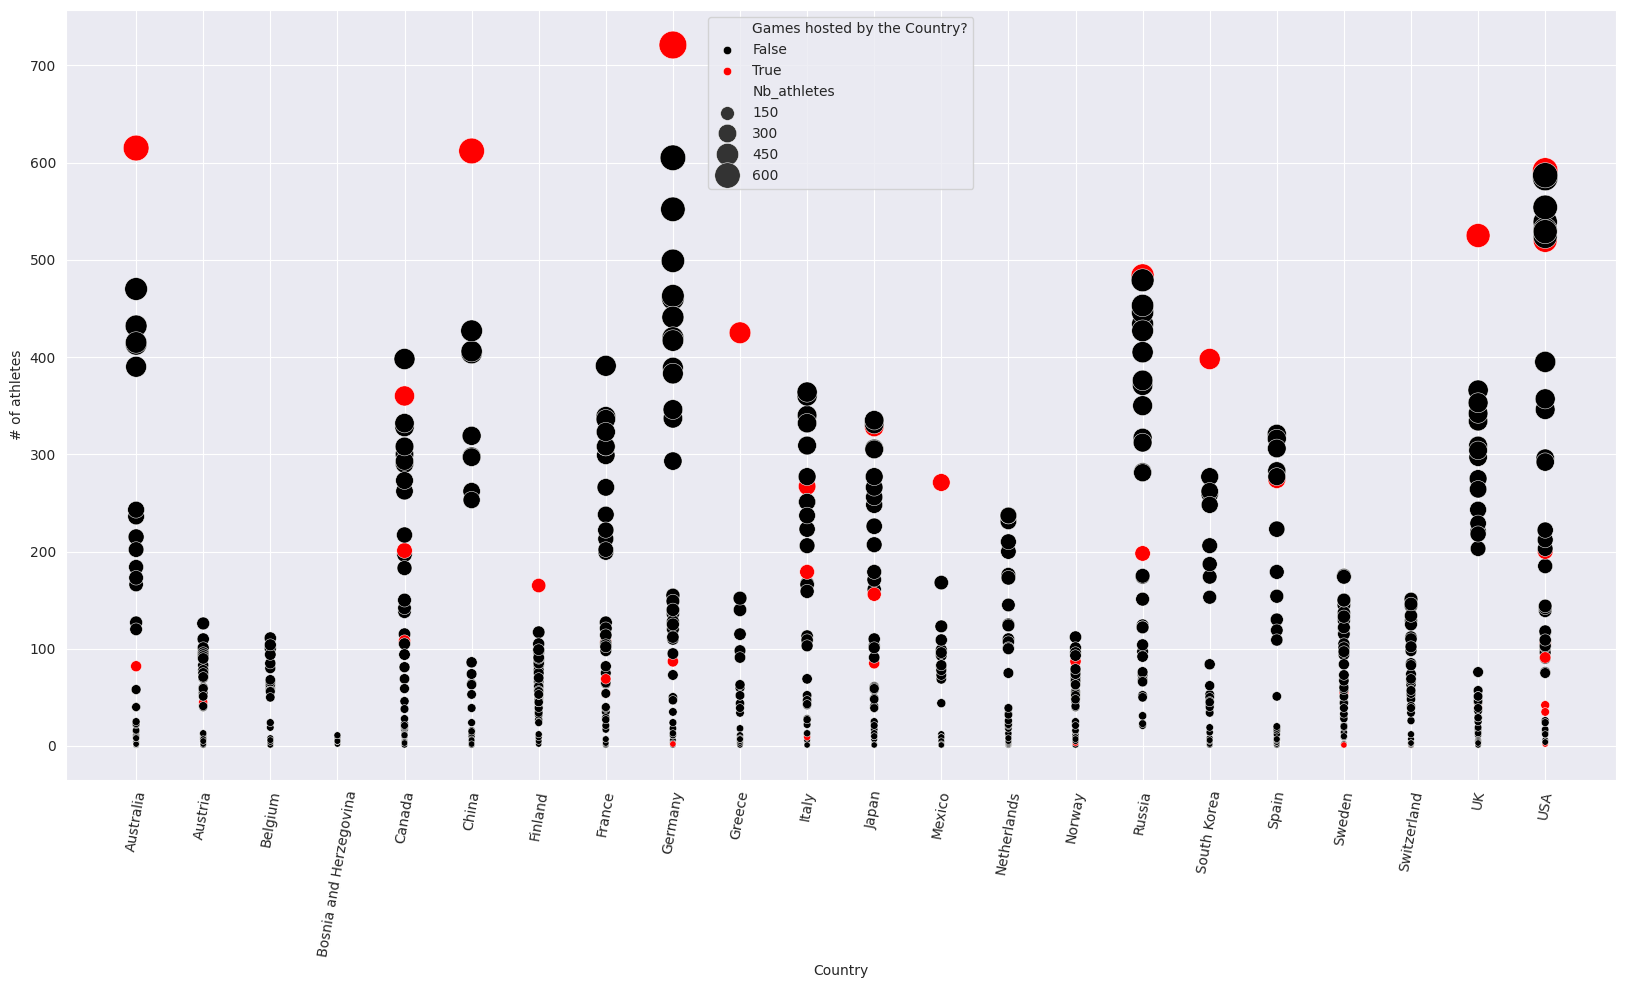

In [80]:
nb_athletes_per_group = hosts_df.groupby(['Country', 'Games', 'Won_host_country'])["Name"].nunique().reset_index().rename(columns={
  'Name': 'Nb_athletes',
  'Won_host_country': 'Games hosted by the Country?'
})

plt.figure(figsize=(20, 10))
sns.scatterplot(data=nb_athletes_per_group, x='Country', y='Nb_athletes', palette=['black', 'red'], size='Nb_athletes', hue='Games hosted by the Country?', sizes=(20, 400))
plt.ylabel('# of athletes')
plt.xticks(rotation=80)

In general, a country that hosts the Games have a bigger delegation, which can be tied to geographical and financial reasons.

### Interactive map

In [72]:
all_medals_df = medal_winners_df.groupby("Country")["Medal"].count().reset_index()
fig = px.choropleth(all_medals_df,
                    locations="Country",
                    projection='robinson',
                    locationmode="country names",
                    range_color=(0, all_medals_df["Medal"].max()),
                    color="Medal", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Bluyl,
                    labels={'Medal': 'Total number of medals'})
fig.show()

If we look at the total number of medals in history, we tend to see a northern dominance ("northern" in the modern, geopolitical sense). Indeed, before World War II, a lot of southern countries were still colonies, and even after they may not have had the means to participate.

Nowadays, big countries such as China, Australia and Brazil can easily catch up thanks to their great population and rapidly-developing economies.

## 3. Expert Data visualization (not finished)

The following question is also optional. Those who will complete it correctly will receive a bonus.

**Question 10 for expert** <br>
Use the folium, branca and geopandas packages to create an interactive map (folium.map).<br>
On this map, when you move the mouse over a country, a small display shows the country, the number of total medals, and the number of gold, silver and bronze medals. <br>
For the shape of the countries, we'll use polygons isssu from the code provided below. <br>

In [30]:
!pip install geopandas --quiet

In [31]:
medal_types = medal_winners_df.groupby(['Country', 'Medal'])['Medal'].value_counts().reset_index()

In [32]:
adapted_all_medals_df = all_medals_df.rename(columns={'Medal': 'count'})
adapted_all_medals_df['Medal'] = 'All'
medal_types = pd.concat([medal_types, adapted_all_medals_df])

In [34]:
from folium.plugins import Search
from folium.plugins import HeatMap
import branca
import folium
from folium import plugins
import geopandas as gpd


# For geographic plotting
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'
global_polygons = gpd.read_file(country_shapes)
global_polygons.to_file('global_polygons.geojson', driver = 'GeoJSON')


#Dataset to create
#Usefull and style function to build

m = folium.Map(location=(50,0),zoom_start=3)

Map_Layer = folium.GeoJson(
  global_polygons,
  name='Countries',
  tooltip=folium.GeoJsonTooltip(
    fields=['']
  )
).add_to(m)

colormap = branca.colormap.LinearColormap(
    colors=["#f2f0f7", "#cbc9e2", "#9e9ac8", "#756bb1", "#54278f"],
    index=states["density"].quantile([0.2, 0.4, 0.6, 0.8]),
    vmin=minimum,
    vmax=maximum,
)

colormap.caption = "Total number of medals per country"
colormap.add_to(m)


minimap = plugins.MiniMap()
m.add_child(minimap)
folium.LayerControl().add_to(m)
m.save('map.html')

NameError: name 'states' is not defined